6.4: Plot the degree distribution of this network. Start from a plain degree distribution, then in log-log scale, finally plot the complement of the cumulative distribution.

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
G = nx.read_edgelist("6_4_data.txt")

196591


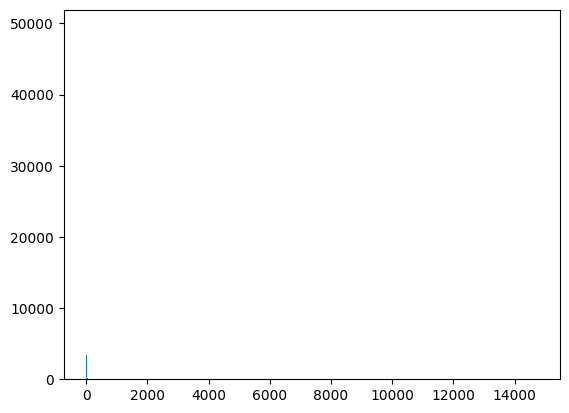

In [29]:
#1
degs = G.degree(G.nodes())
max_degree = max(degs, key=lambda x: x[1])[1]
nodes_per_degree = [0]*(max_degree+1)
for (n, d) in degs:
    nodes_per_degree[d] += 1
print(sum(nodes_per_degree))

plt.hist(range(max_degree+1), bins=max_degree+1, weights=nodes_per_degree)
plt.show()

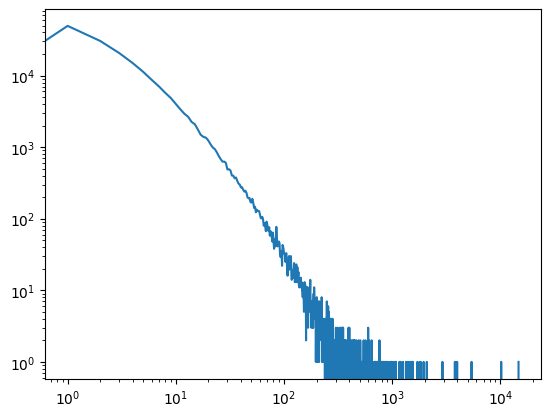

In [30]:
#2
plt.loglog(range(max_degree+1), nodes_per_degree)
plt.show()

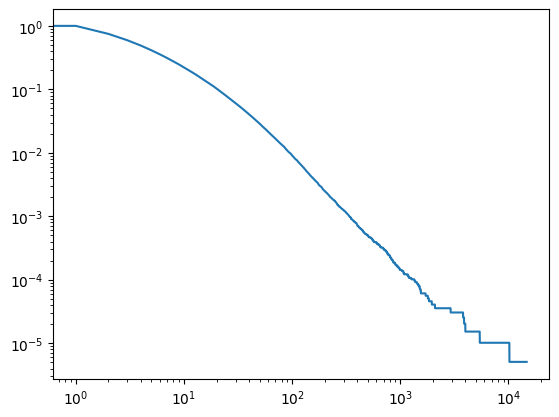

In [31]:
#3 
N = G.number_of_nodes()
cum_nodes_per_degree = [sum(nodes_per_degree[i:])/N for i in range(max_degree+1)]
plt.loglog(range(max_degree+1), cum_nodes_per_degree)
plt.show()

6.5 Estimate the power law exponent of the CCDF degree distribution from Exercise 6.4. First by a linear regression on the log-log plane, then by using the powerlaw package. Do they agree? Is this a shifted power law? If so, what's k min? (Hint: powerlaw can calculate this for you)

In [32]:
x = np.array(list(range(max_degree+1)))
y = np.array(cum_nodes_per_degree)
log_x = np.where(x != 0, np.log(x), 0)
log_y = np.where(y != 0, np.log(y), 0)

import statsmodels.formula.api as smf 
model = smf.ols(formula='log_y ~ log_x', data={'log_x': log_x, 'log_y': log_y}).fit()
print(model.summary())

import powerlaw
dags = np.array([d for (n, d) in degs])+1
fit = powerlaw.Fit(dags)
print(fit.power_law.alpha)
print(fit.power_law.xmin)

C:\Users\thore\AppData\Local\Temp\ipykernel_13800\1735686163.py:3: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x != 0, np.log(x), 0)


                            OLS Regression Results                            
Dep. Variable:                  log_y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 4.995e+05
Date:                Sat, 16 Sep 2023   Prob (F-statistic):               0.00
Time:                        09:58:23   Log-Likelihood:                 251.64
No. Observations:               14731   AIC:                            -499.3
Df Residuals:                   14729   BIC:                            -484.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8241      0.017     48.607      0.0

6.6 Find a way to fit the truncated power law of this network. Hint: use the scipy.optimize.curve_fit to fit an arbitrary function and use the functional form I provide in Chapter 6 of the book.

C:\Users\thore\AppData\Local\Temp\ipykernel_13800\1894635150.py:6: RuntimeWarning: divide by zero encountered in log10
  return np.log10(power_exp(k, a, l))
c:\Users\thore\miniconda3\envs\neana\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


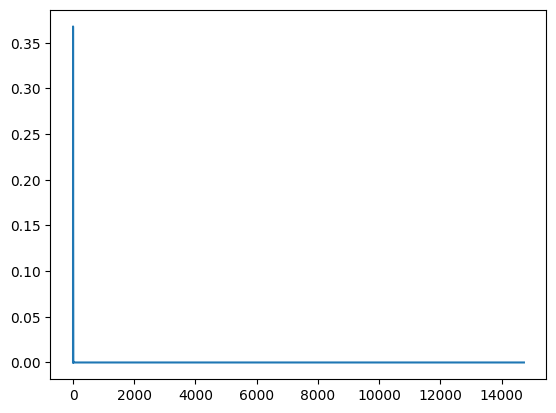

In [33]:
from scipy.optimize import curve_fit

def power_exp(k, a, l):
    return k**a * np.exp(-l*k)
def power_log(k, a, l):
    return np.log10(power_exp(k, a, l))

x, y = range(max_degree+1), cum_nodes_per_degree
popt, pcov = curve_fit(power_log, x, np.log10(y), p0=(1, 1))
fit = [power_exp(x_i, popt[0], popt[1]) for x_i in x]

plt.plot(x, fit)
# ???

9.3 Calculate the global, average and local clustering coefficient for this network.

In [34]:
G = nx.read_edgelist('9_3_data.txt')
glb = nx.transitivity(G)
avg = nx.average_clustering(G)
loc = nx.clustering(G)
print(glb)
print(avg)
print(loc)

0.12443636088060324
0.6464630921565044
{'100': 1.0, '101': 1.0, '10': 0.6, '11': 0.5333333333333333, '15': 0.03110920403346921, '30': 0.6, '103': 0.4166666666666667, '104': 0.7111111111111111, '259': 0.34615384615384615, '422': 1.0, '451': 0, '341': 0.6666666666666666, '344': 0.5454545454545454, '105': 0.6666666666666666, '106': 0.47619047619047616, '107': 0.7, '108': 0.4358974358974359, '110': 0.37777777777777777, '109': 0.5, '189': 0.45454545454545453, '193': 0.5833333333333334, '111': 0.6, '180': 0.4444444444444444, '331': 0.42857142857142855, '166': 0.33088235294117646, '210': 0.37777777777777777, '264': 0.3055555555555556, '329': 0.7, '12': 0.12656641604010024, '13': 0.14761904761904762, '14': 0.4, '112': 0.6071428571428571, '113': 0.5272727272727272, '115': 0.6, '116': 1.0, '114': 0.31620553359683795, '139': 0.4444444444444444, '202': 0.5, '244': 0.5714285714285714, '117': 1.0, '138': 0.2904761904761905, '268': 0.6, '316': 1.0, '317': 1.0, '356': 0.6071428571428571, '396': 0.25, 

9.4 What is the size in number of nodes of the largest maximal clique of the network used in Exercise 9.3? Which nodes are part of it?

In [35]:
maximal_cliques = list(nx.find_cliques(G))
size_larges_clique = nx.graph_clique_number(G, cliques=maximal_cliques) # deprecate
biggest_clique = [clique for clique in maximal_cliques if len(clique) == size_larges_clique][0]
print(biggest_clique)

['15', '5', '2', '13', '12', '4', '86', '82', '87']


C:\Users\thore\AppData\Local\Temp\ipykernel_13800\245224037.py:2: DeprecationWarning: 

graph_clique_number is deprecated and will be removed.
Use: ``max(len(c) for c in nx.find_cliques(G))`` instead.
  size_larges_clique = nx.graph_clique_number(G, cliques=maximal_cliques) # deprecate


10.4 What's the diameter of the graph below? What's its average path length?  
![](1.png)

The diameter is the longest shortest path. The shortest path from 1 to 8 is 4. This is the longest shortest path (along with 1 to 9) so the diameter is 4.  
The average path length is 1.888888... That is because we have 9*8 paths, of total length of 136.

11.4 What's the most central node in the network used for Exercise 11.3 according to PageRank? How does PageRank compares with the in-degree? (for instance, you could calculate the Spearman and/or Pearson correlation between the two)

In [36]:
from scipy.stats import pearsonr, spearmanr

G = nx.read_edgelist('11_3_data.txt', create_using=nx.DiGraph())
pagerank = nx.pagerank(G)
most_central = max(pagerank, key = pagerank.get)
print("Most central node: %s (PR = %1.4f)" % (most_central, pagerank[most_central]))
# Let's get all the in-degrees and calculate the spearman and pearson correlation
degree = dict(G.in_degree)
pagerank_np = np.array([pagerank[v] for v in G.nodes])
degree_np = np.array([degree[v] for v in G.nodes])
r, p = pearsonr(pagerank_np, degree_np)
print("Pearson correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

r, p = spearmanr(pagerank_np, degree_np)
print("Spearman correlation between PR and in-degree: %1.4f (p-value = %1.4f)" % (r, p))

Most central node: 836 (PR = 0.0032)
Pearson correlation between PR and in-degree: 0.8693 (p-value = 0.0000)
Spearman correlation between PR and in-degree: 0.8965 (p-value = 0.0000)


11.5 Which is the most authoritative node in the network used for Exercise 11.3? Which one is the best hub? Use the HITS algorithm to motivate your answer (if using networkx, use the scipy version of the algorithm).

In [38]:
hits = nx.hits(G)
best_hub = max(hits[0], key=hits[0].get)
best_auth = max(hits[1], key=hits[1].get)

print(f"Best Hub: {best_hub}")
print(f"Best Authority: {best_auth}")

Best Hub: 2375
Best Authority: 2056


11.7 Calculate the k-core decomposition of this network. What's the highest core number in the network? How many nodes are part of the maximum core?

In [44]:
G = nx.read_edgelist('11_7_data.txt')
core = nx.k_core(G)
max_core = max(core)
num_nodes = len(core[max_core])
print(f"Biggest core of size {max_core} with {num_nodes} nodes")

Biggest core of size 99 with 15 nodes
